## Why machine learning? 

* give a few applications 
* explain why machine learning is superior to procedural programming
* convince programmers they must learn it, and companies they must board the train now

## Machine learning for classification

Let's get a basic feel for how a neural network can be trained for classification. 

In this post, our goal is to get started hands on with machine learning fast and easy, so this explanation of machine learning is over simplified. But there will definitely be a more detailed post about the training principles later on, so stay tuned if you're interested. 

![Supervised learning](https://github.com/cbernet/maldives/raw/master/handwritten_digits_sklearn/supervised_learning.png)

The network is presented with a succession of training examples. Each training example consists of: 

* the image of a digit
* a label, which tells us which digit the image truly represents. For a given image, the label could be told to us by the person who wrote the digit in the first place. 

In the drawing above, the first image is processed by the neural network, which produces an answer: this is a 9.  
At first, the connections between the neurons in the network are random, and the network is not able to do anything useful. It just provides a random answer. 

The answer is compared to the label. In this case, the answer (9) is different from the label (the digit is actually a 3), and some feedback is given to the neural network so that it can improve. The connections between the neurons are modified, favouring the ones that tend to give a correct answer. 

After the modification, the next examples are considered, and the neural network learns in an iterative process. 

The number of training examples needed to train the network properly could be of the order of a few hundred for networks with a simple architecture, and millions for complex networks.  

## Installing python and its scientific library

**if you're already running this tutorial in your jupyter notebook, please skip this section.**

We will use a variety of tools from scipy, the scientific python library: 

* **scikit-learn**: one of leading machine-learning toolkits for python. It will provide an easy access to the handwritten digits dataset, and allow us to define and train our neural network in a few lines of code
* **numpy**: core package providing powerful tools to manipulate data arrays, such as our digit images
* **matplotlib**: visualization tools, essential to check what we are doing
* **jupyter**: the web server that will allow you to follow this tutorial and run the code in your web browser. 

Scipy is actually not a single library, but an "ecosystem" of interdependent python packages.

This ecosystem is full of snakes and beasts fighting survival -- you do not want to hang in there alone.  

And indeed, six years ago, when I first got started with scipy, I tried to install manually all the packages I needed on top of the version of python already installed in my system. 

I spent almost a day fighting against conflicting dependencies for these packages. For example, scikit-learn might need numpy version A, but pandas needs numpy version B. Or, one of these packages requires a version of python more recent than the one you have, meaning that you need to install an additional version of python and deal with your two versions later on.   

And then, I discovered Anaconda. 

As stated on Anaconda's website: 

*With over 6 million users, the open source Anaconda Distribution is the fastest and easiest way to do Python and R data science and machine learning on Linux, Windows, and Mac OS X. It's the industry standard for developing, testing, and training on a single machine.*

In a nutshell, the anaconda team maintains a repository of more than 1400 data science packages, all compatible, and provides tools to install a version of python and these packages at the push of a button, and under five minutes. 

Let's do it now!

First, [download anaconda](https://www.anaconda.com/download/) for your system: 

* Choose the python 2.X version, not the 3.X version.
* If you're using windows or linux, make sure to pick the 64bit installer if you have a 64bit system. 

Run the installer, and finally start the Anaconda Navigator. On windows, you can find it by clicking the windows start button, and typing anaconda. 

In the Anaconda Navigator window, click on the Home tab, and launch the jupyter notebook. 

Create a new notebook. In your notebook, you should see an empty cell, where you can write python code. Copy-paste the following lines, and execute the cell by pressing shift + enter.  

```python
print 'hello world!'
for i in range(10):
    print i
```

A new cell appears. Import numpy and matplotlib (remember that you need to execute the cell):

```python
import matplotlib.pyplot as plt 
import numpy as np 
```

This is a standard way to import these modules: 

* the pyplot module of matplotlib is called plt in this context
* the numpy module is called np 

You can very well choose other names, but these ones are used by almost everybody, so it's easier to use them as well. 

Now let's try and do our first plot, just to make sure that numpy and matplotlib are working:

```python 
# create a numpy 1-D array with evenly spaced values, from 0 to 10 
x = np.linspace(0, 10, 11)
print x 
# create a new numpy array. x**2 means that each element of x is squared
y = x**2
print y
# plot y versus x, you should get a parabola. check that for x = 1 we have y = 1, and that for x = 2, y = 4. 
plt.plot(x, y)
```

--- 

**A word of caution:**

It is easy to get lost in the documentation of all these tools, and to waste a lot of time. 

For example, if you check the documentation of the plt.plot method (I won't give you the link ;-) but you could google it), you will see that there are lots of ways to call it, with many optional parameters. But after all, do we need to know more than this: `plt.plot(x,y)` plots y vs x ? 

If you want to have fun, I suggest to follow this tutorial until the end without digging deeper. 

You'll train your first neural net easily and in the process, you'll get an understanding of the most important scikit-learn, numpy, and matplotlib tools. That's more than enough for a variety of machine learning tasks, and you can always learn more about specific features of these tools when you need them later on (you'll know!) 

---

Now that you have access to the jupyter notebook, I have good news. You won't need to keep copy-pasting code from this page to your notebook. Instead, just download [this notebook](https://github.com/cbernet/maldives/blob/master/handwritten_digits_sklearn/handwritten_digits_sklearn.ipynb) and open it with the jupyter notebook. 

**FIND A WAY TO PROVIDE DIRECT DOWNLOAD ACCESS TO THE NOTEBOOK. THINK ABOUT ADDITIONAL FILES LIKE IMAGES**

## The MNIST digits dataset

scikit-learn comes with several test datasets. Let's load the MNIST handwritten digits dataset, and let's print some information about this dataset:

In [132]:
from sklearn import datasets
digits = datasets.load_digits()

In python, the `dir` function returns the names of the attributes of an object. Let's use this function to check what can be found in the digits object:

In [133]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

Let's have a look in more details at the other attributes. We are going to start by checking the type of each attribute:

In [134]:
for attr in dir(digits):
    print type(getattr(digits, attr))

<type 'str'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


data, images, target, and target names are all ndarrays (N-dimensional arrays) from the numpy package. The shape attribute of an ndarray gives the number of dimensions and the size along each dimension of the array. For example:

In [135]:
digits.images.shape

(1797, 8, 8)

digits.image is an array with 3 dimensions. The first dimension indexes images, and we see that we have 1797 images in total. The next two dimensions correspond to the x and y coordinates of the pixels in each image. Each image has 8x8 = 64 pixels. In other words, this array could be represented in 3D as a pile of images with 8x8 pixels each. Let's plot the first image:

let's look at the data of the first 8x8 image. Each slot in the array corresponds to a pixel, and the value in the slot is the amount of black in the pixel

In [136]:
print digits.images[0]

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Now let's display this image:

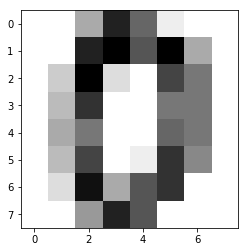

In [137]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')

The image is low resolution. The original digits were of much higher resolution, and the resolution has been decreased when creating the dataset to make it easier to train a machine learning algorithm to recognize these digits. 

Now let's investigate the target attribute. It is a 1-dimensional array with 1797 slots. Looking into the array, we see that it contains the true numbers corresponding to each image. For example, the first target is 0, and corresponds to the image drawn just above.  

In [138]:
print digits.target.shape
print digits.target

(1797,)
[0 1 2 ... 8 9 8]


Let's have a look at some more images using this function: 

In [139]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

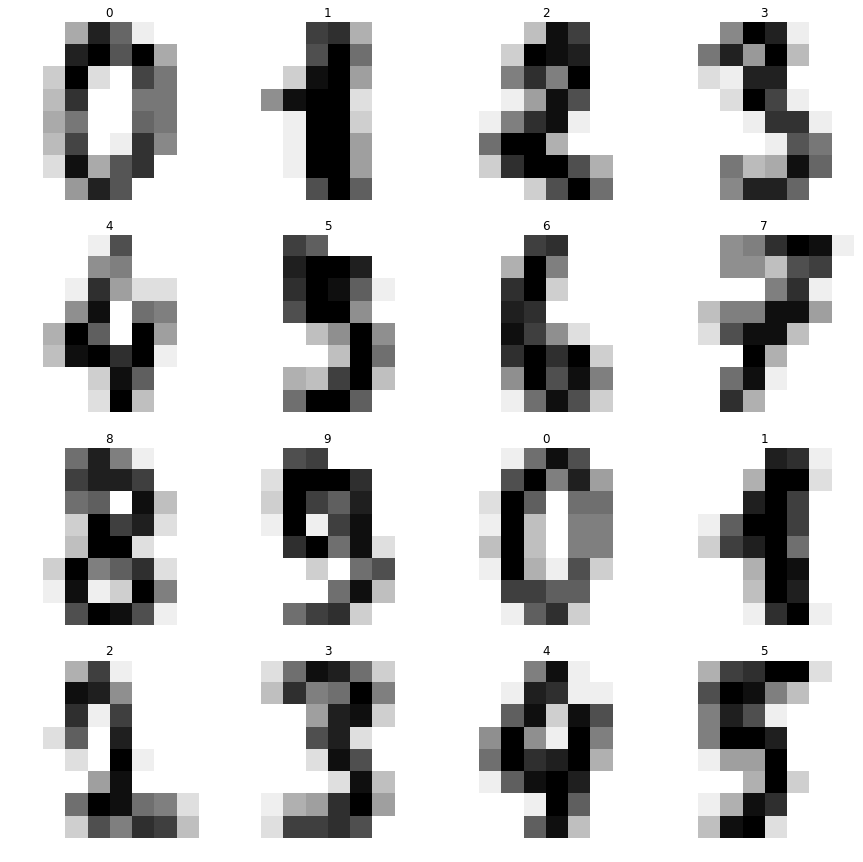

In [140]:
plot_multi(0)

you can have a look at the next digits by calling `plot_multi(16)`, `plot_multi(32)`, etc. You will probably see that with such a low resolution, it's quite difficult to recognize some of the digits, even for a human. In these conditions, our neural network will also be limited by the low quality of the input images. Can the neural network perform at least as well as a human? It would already be a good achievement! 

## Building the network and preparing the input data

With [scikit-learn](https://scikit-learn.org), creating, training, and evaluating a neural network can be done with only a few lines of code. 

We will make a very simple neural network, with three layers: 

* an input layer, which will map to the pixels in the input image
* a hidden layer
* an output layer with 10 neurons corresponding to our 10 classes of digits, from 0 to 9. 


A multilayer perceptron requires a 1-dimensional array in input, but our images are 2-d. So we need to flatten all images:

In [141]:
x, y = digits.images, digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

We now have 1797 flattened images. The two dimensions of our 8x8 images have been collapsed into a single dimension by  writing the rows of 8 pixels as they come, one after the other. The first image that we looked at earlier is now represented by a 1-D array with 8x8 = 64 slots. Please check that the values are the same as in the original 2-D image. 

In [142]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

let's now split our data into a training sample and a testing sample:

In [143]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

We can now create our multilayer perceptron. As a first try, we use one hidden layers with 50 neurons. The output layer must have exactly 10 neurons because we want to classify our digits in 10 categories. Don't pay attention to the other parameters, we'll cover that in future posts.

In [144]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)
mlp.classes_ = range(10)


Finally, we can train the MLP: 

In [145]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.15019610
Iteration 2, loss = 1.49780507
Iteration 3, loss = 0.91623697
Iteration 4, loss = 0.54269819
Iteration 5, loss = 0.33536513
Iteration 6, loss = 0.22530172
Iteration 7, loss = 0.16567440
Iteration 8, loss = 0.12843622
Iteration 9, loss = 0.10363953
Iteration 10, loss = 0.08751211
Iteration 11, loss = 0.07594162
Iteration 12, loss = 0.06681904
Iteration 13, loss = 0.06052683
Iteration 14, loss = 0.05464128
Iteration 15, loss = 0.04954497
Iteration 16, loss = 0.04541317
Iteration 17, loss = 0.04266085
Iteration 18, loss = 0.03966078
Iteration 19, loss = 0.03651245
Iteration 20, loss = 0.03428558
Iteration 21, loss = 0.03250458
Iteration 22, loss = 0.03085384
Iteration 23, loss = 0.02933832
Iteration 24, loss = 0.02790287
Iteration 25, loss = 0.02672239
Iteration 26, loss = 0.02536589
Iteration 27, loss = 0.02435473
Iteration 28, loss = 0.02329219
Iteration 29, loss = 0.02250241
Iteration 30, loss = 0.02158760
Iteration 31, loss = 0.02088018
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

Now that the MLP has been trained, let's see what it can say about our test images:

In [146]:
predictions = mlp.predict(x_test)
predictions[:50] # we just look at the 1st 50 examples in the training sample

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

These predictions should be fairly close to the targets of our training sample. Let's check by eye (please compare the values of these arrays)

In [147]:
y_test[:50] # true labels for the 1st 50 examples in the training sample

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

Not bad! we see that most (if not all) predictions match the true labels.

But can we be a bit more quantitative? We can compute the accuracy of the classifier, which the probability for a digit to be classified in the right category. Again, scikit-learn comes with a handy tool to do that: 
    

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9410288582183187

**We managed to get a 94% accuracy with this very simple neural network!** 

## Conclusion and outlook

In future posts, we will:

* optimize our network to further increase the accuracy,
* use deep learning to reach extreme accuracies,
* dive a bit more into the mechanism of the training to understand why we have created the MLP with these parameters.